In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Mihai\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns

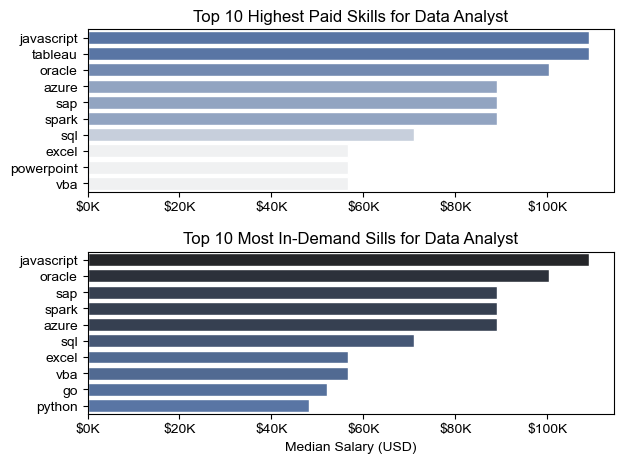

In [10]:
df_da_ro = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Romania')].copy()
df_da_ro = df_da_ro.dropna(subset = ['salary_year_avg'])
df_da_ro = df_da_ro.explode('job_skills')
df_da_ro[['salary_year_avg','job_skills']].head()
df_da_ro_group = df_da_ro.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_da_top_pay = df_da_ro_group.sort_values(by='median',ascending=False).head(10)
df_da_skills = df_da_ro_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

fig,ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

#df_da_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0], legend = False)
sns.barplot(data=df_da_top_pay,x='median',y=df_da_top_pay.index,ax=ax[0], hue = 'median',palette='light:b')

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[0].legend().remove()


#df_da_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
sns.barplot(data=df_da_skills,x='median',y=df_da_skills.index,ax=ax[1],hue = 'median',palette='dark:b_r')

ax[1].set_title('Top 10 Most In-Demand Sills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.tight_layout()
plt.show()

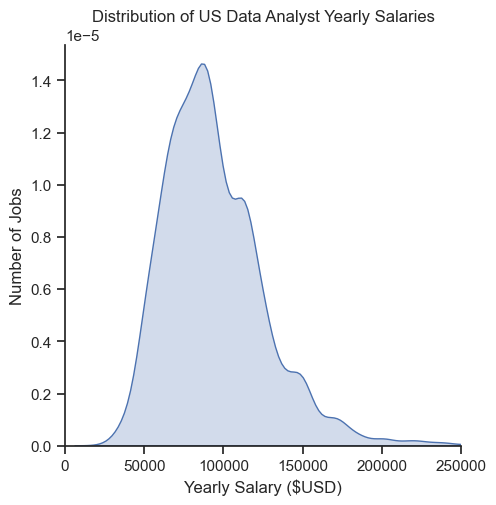

In [15]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
#df_da_us['salary_year_avg'].plot(kind = 'hist',bins = 40 ,edgecolor = 'black')

sns.displot(df_da_us['salary_year_avg'],kind = 'kde',fill = True)

plt.xlim(0,250000)
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')

plt.show()

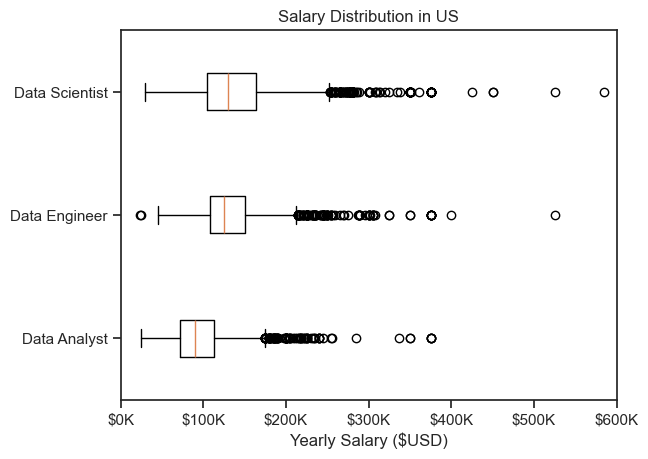

In [16]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = ['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']==title]['salary_year_avg'] for title in job_titles]

plt.boxplot(job_list,labels=job_titles,vert=False)
plt.title('Salary Distribution in US')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
plt.xlim(0,600_000)
plt.show()

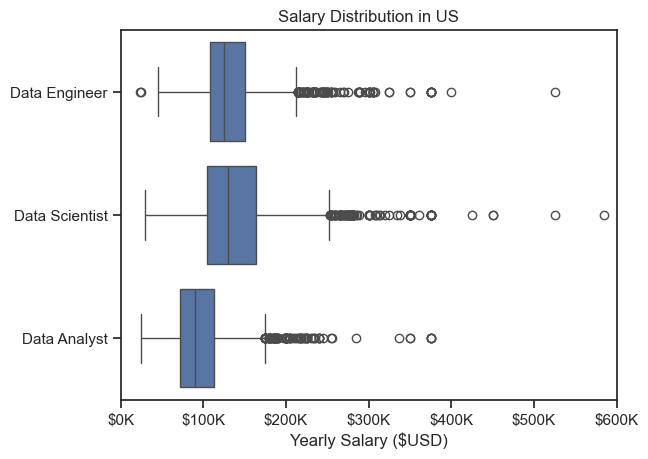

In [19]:
sns.boxplot(data=df_US, x = 'salary_year_avg' , y='job_title_short')

plt.title('Salary Distribution in US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
plt.xlim(0,600_000)
plt.show()